In [152]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
!pip install xgboost
from xgboost import XGBClassifier



XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <F2F42313-BF4F-3B95-A853-AE1DE94D4C87> /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


In [119]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [120]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [121]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [122]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [123]:
df.drop('PaymentMethod', axis=1, inplace=True)


In [124]:
# map yes/no, male/female to 1/0
binary_columns = ['Churn', 'Partner', 'Dependents','OnlineBackup', 'PhoneService', 'PaperlessBilling', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV',	'StreamingMovies']

for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df['gender']=df['gender'].map({'Male': 1, 'Female':0})

df['MultipleLines']=df['MultipleLines'].map({'Yes': 1, 'No':0, 'No phone service': 2})

df['InternetService']=df['InternetService'].map({'DSL': 5, 'Fiber Optic': 10})

df['Contract']=df['Contract'].map({'Month-to-month': 6, 'One year': 10})

In [125]:
# Convert TotalCharges to numeric and handle errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values with the median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [126]:
# Standardize numerical columns
scaler = StandardScaler()
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [127]:
# Separate the target variable (Churn) from the features.
# Features (X) and target (y)
X = df.drop(['Churn', 'customerID'], axis=1)  # Drop target and irrelevant columns
y = df['Churn']


In [128]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [129]:
# Drop rows with missing values in both training and testing sets
X_train = X_train.dropna()
X_test = X_test.dropna()

# Align `y_train` and `y_test` with the modified `X_train` and `X_test`
y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]


In [ ]:
print(X_train.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [131]:


# Initialize the model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Detailed evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.78
Confusion Matrix:
[[257  15]
 [ 62  20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       272
           1       0.57      0.24      0.34        82

    accuracy                           0.78       354
   macro avg       0.69      0.59      0.61       354
weighted avg       0.75      0.78      0.75       354



In [134]:


# Initialize the model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Detailed evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.75
Confusion Matrix:
[[244  28]
 [ 59  23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       272
           1       0.45      0.28      0.35        82

    accuracy                           0.75       354
   macro avg       0.63      0.59      0.60       354
weighted avg       0.72      0.75      0.73       354



In [153]:
# Print the accuracy of both models
print(f'Logistic Regression Accuracy: {accuracy:.2f}')
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')


Logistic Regression Accuracy: 0.78
Random Forest Accuracy: 0.75


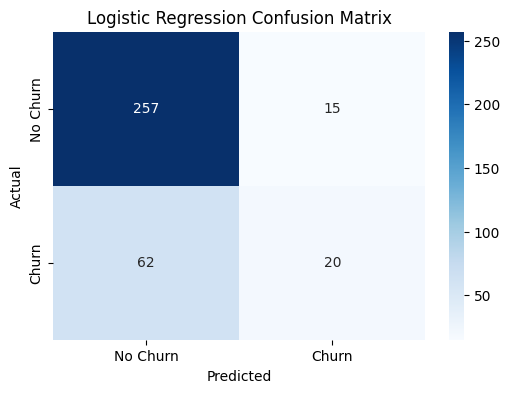

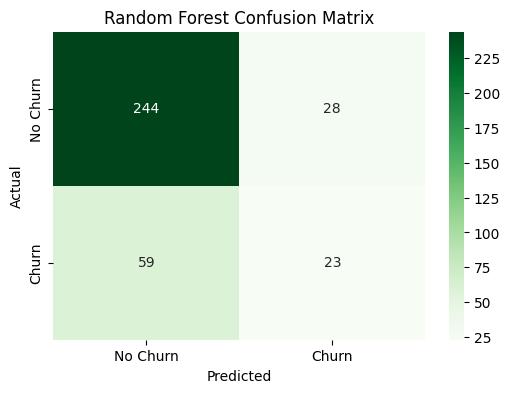

In [154]:
# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

             Feature  Importance
17      TotalCharges    0.264088
16    MonthlyCharges    0.205766
4             tenure    0.162134
0             gender    0.035364
15  PaperlessBilling    0.031665
6      MultipleLines    0.030201
8     OnlineSecurity    0.029270
11       TechSupport    0.028990
9       OnlineBackup    0.028127
2            Partner    0.027634
14          Contract    0.026505
1      SeniorCitizen    0.025139
3         Dependents    0.024837
10  DeviceProtection    0.024152
13   StreamingMovies    0.022227
12       StreamingTV    0.022163
5       PhoneService    0.011739
7    InternetService    0.000000


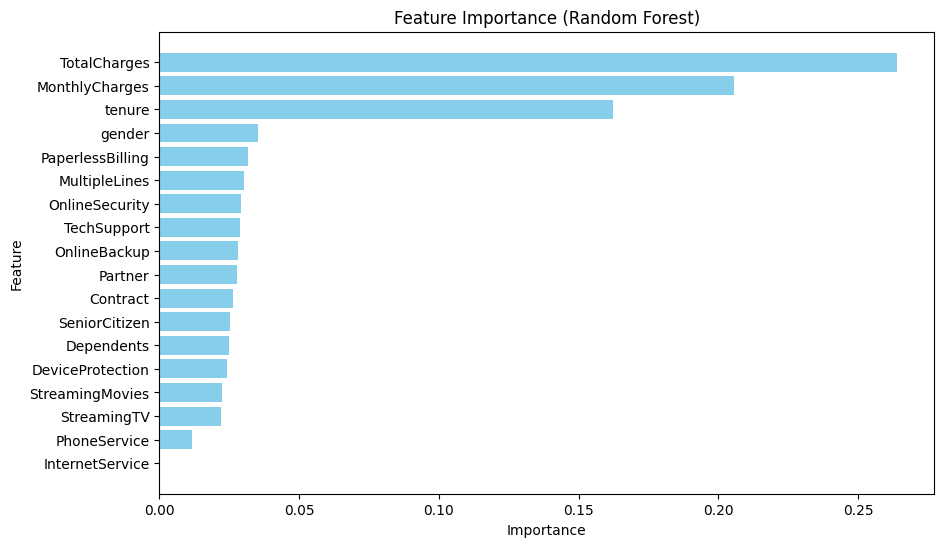

In [155]:
# Feature importance
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': random_forest_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print and visualize the feature importance
print(feature_importances)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

Findings:
Tenure:
Customers with shorter tenures are more likely to churn.
Insight: These customers may not have developed loyalty or satisfaction with the service yet.
Recommendation: Implement a welcome program with special offers, personalized support, or loyalty points during the first few months.


Monthly Charges:
Higher monthly charges are associated with higher churn rates.
Insight: Customers may perceive the service as too expensive.
Recommendation: Introduce discounts, tiered pricing plans, or bundles to retain cost-sensitive customers.

Contract Type:
Customers on month-to-month contracts churn more frequently than those on longer-term contracts.
Insight: Long-term contracts likely reduce churn due to customer commitment or incentives.
Recommendation: Offer incentives like discounts or additional benefits for switching to longer-term contracts.

Internet Service Type:
Certain types of internet services (e.g., DSL) showed higher churn rates.
Insight: These services may not meet customer expectations compared to competitors.
Recommendation: Focus on improving these services through upgrades or consider phasing out underperforming offerings.


Payment Method:
Customers using electronic checks showed higher churn rates compared to those using credit cards or automatic payments.
Insight: Electronic checks may be correlated with less engagement or satisfaction.
Recommendation: Promote the use of automatic payments or credit cards by offering incentives like billing discounts.